# Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df=pd.read_csv('Income Census')

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df.shape

(32560, 15)

This Dataset contains 32560 rows which means 32560 person data avaiable.

Dataset contains 15 columns or attributes.

The 'Income' column is the Target Column.

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The Age, Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week contains Numerical Data.

The Wrokclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income contains categorical data.

Income is the Target Column which has categorical data.So This a categorical type of problem.

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no Null Values present in the Dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Null Values'}>

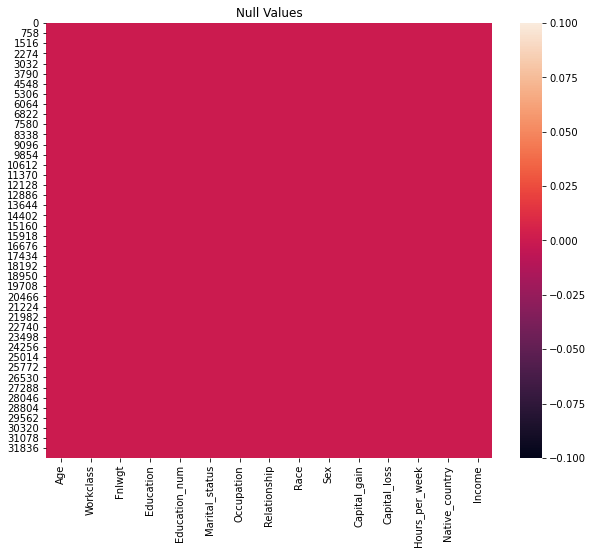

In [9]:
#Ckecking Null Values Using Heatmap
plt.figure(figsize=(10,8))
plt.title('Null Values')
sns.heatmap(df.isnull())

In [10]:
#Statistical Summery
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can see that mostly attributes are Normally distributed.

Attribute Capital_loss and captial_gain contains majority of zero values.Mean, Mean and Min values are zero.

Except Capital_gain and Capital_loss in other columns outlier values are less bcoz all the other 75% and max value difference is less.

# Checking Correlation

<AxesSubplot:title={'center':'Correlation Heat Map'}>

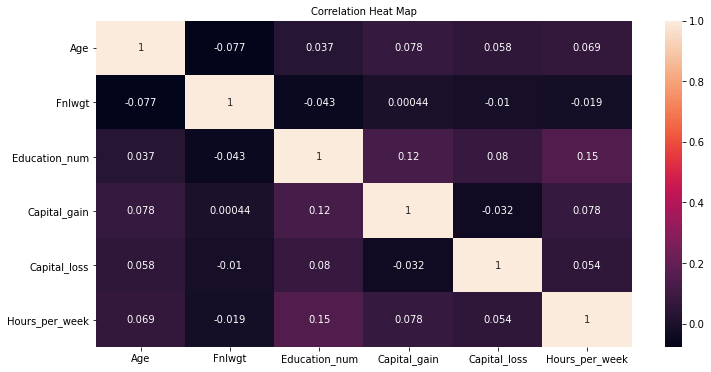

In [11]:
plt.figure(figsize=(12,6))
plt.title('Correlation Heat Map',fontsize=10)
sns.heatmap(df.corr(),annot=True)

#### Checking Categorical Columns

In [14]:
for col in df.select_dtypes(include='object'):
    print('\n',col,'\n')
    print(df.select_dtypes(include='object')[col].value_counts())


 Workclass 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 Education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

 Marital_status 

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

 Occupation 

 Prof-sp

As we can see that Column Workclass,Occupation,Native_country contain '?'.
So have to replace with proper value.As we know that those are catrgorical column, replace'?'' with mode with respective column.

Replaceing '?' with NaN value

In [15]:
df=df.replace(' ?', np.nan)

In [16]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Converting '?' with NaN value

In [17]:
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

Replacing Nan value with Mode for these columns as the columns are Categorical Column.Because mode are best fitted for those columns.

In [18]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values present.

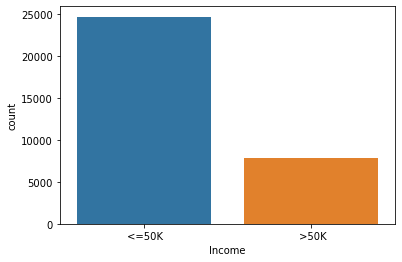

In [19]:
sns.countplot(df.Income)
plt.show()

More people have Less than or equal 50K income

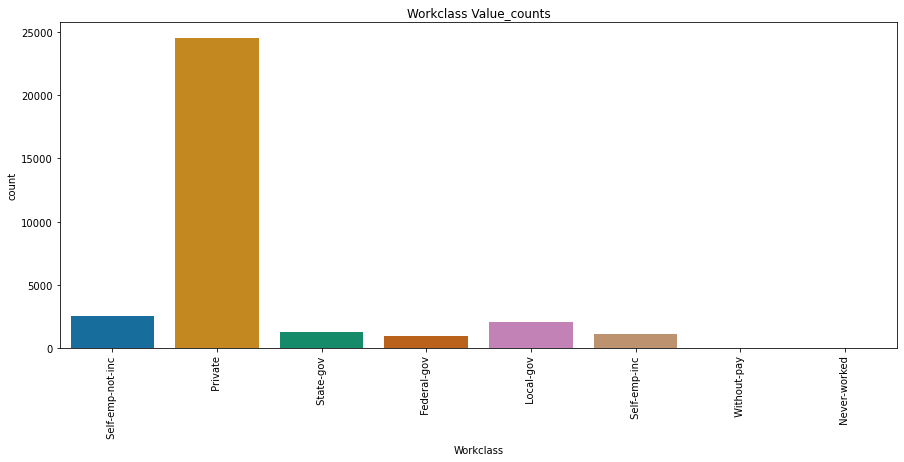

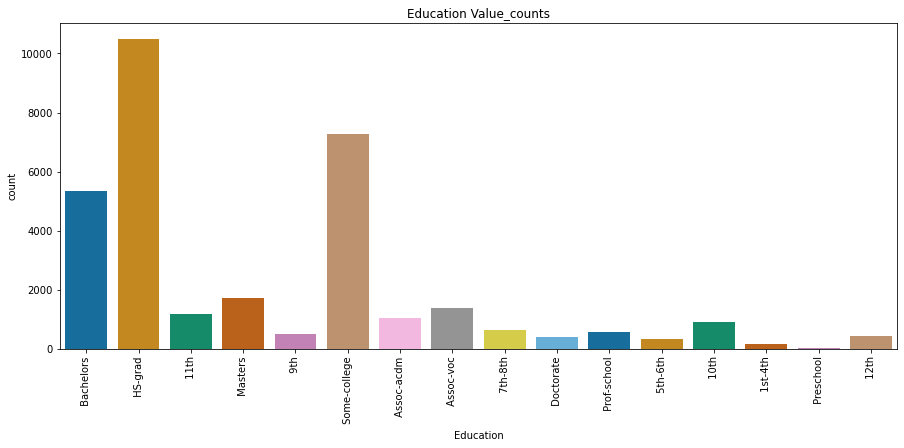

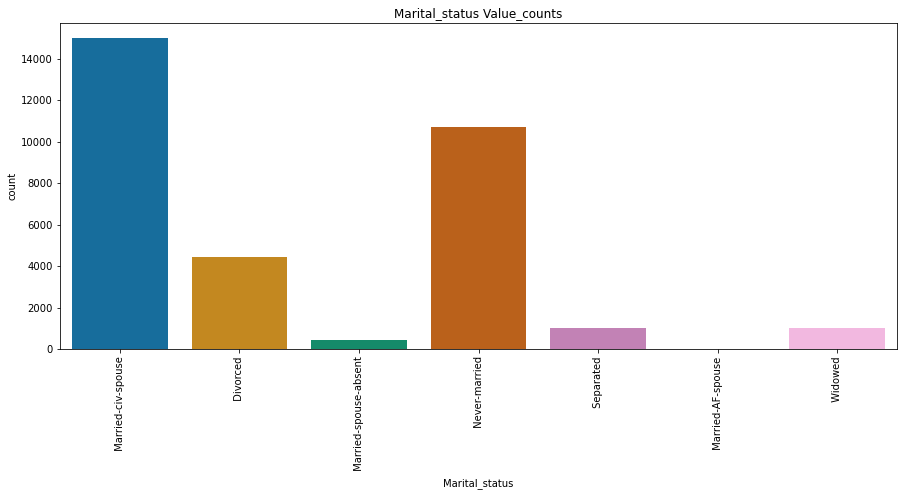

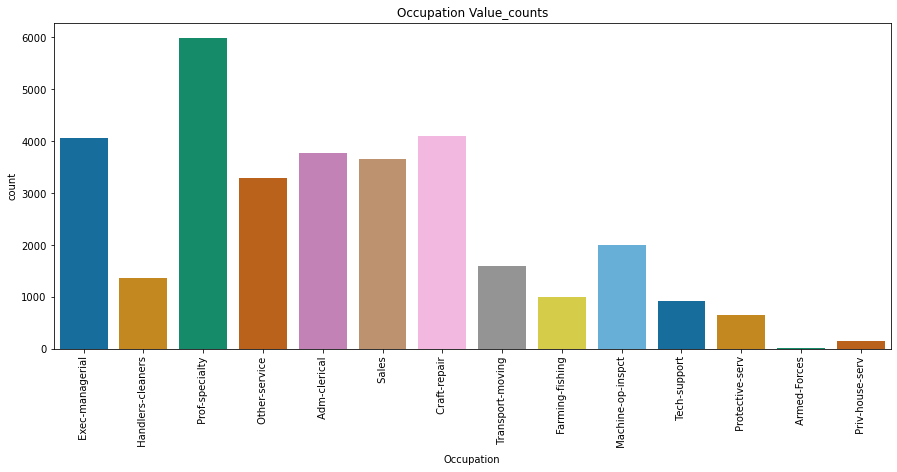

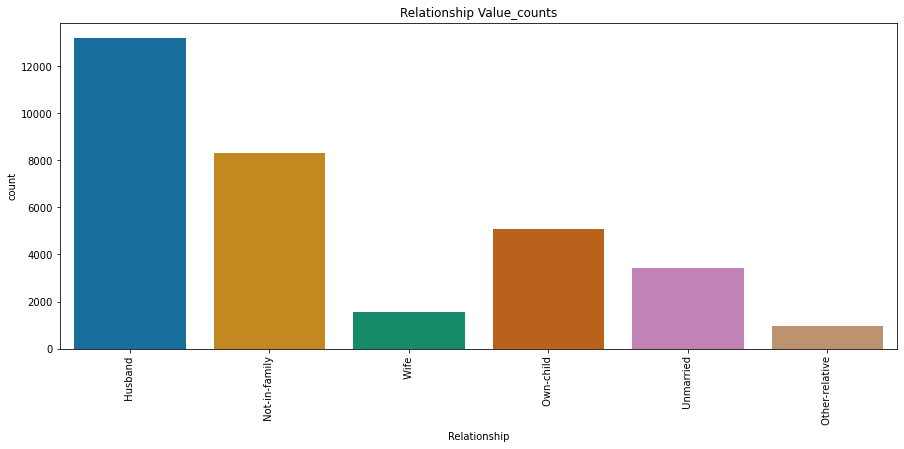

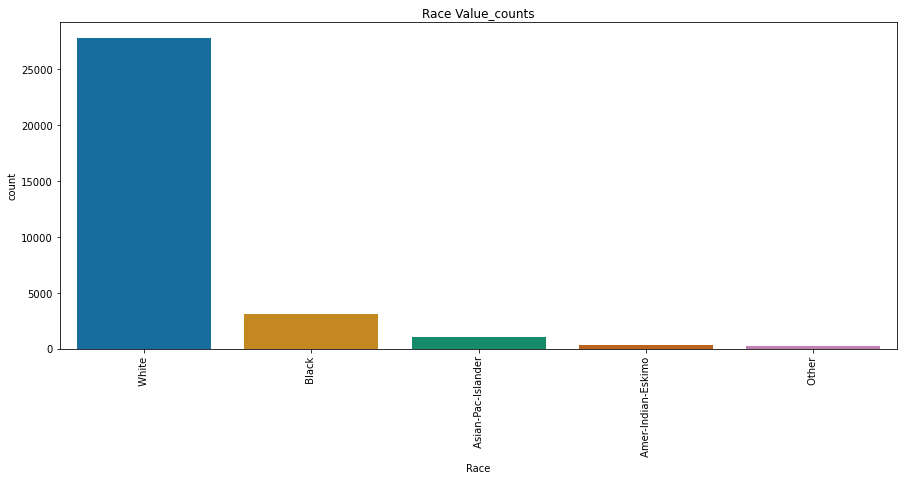

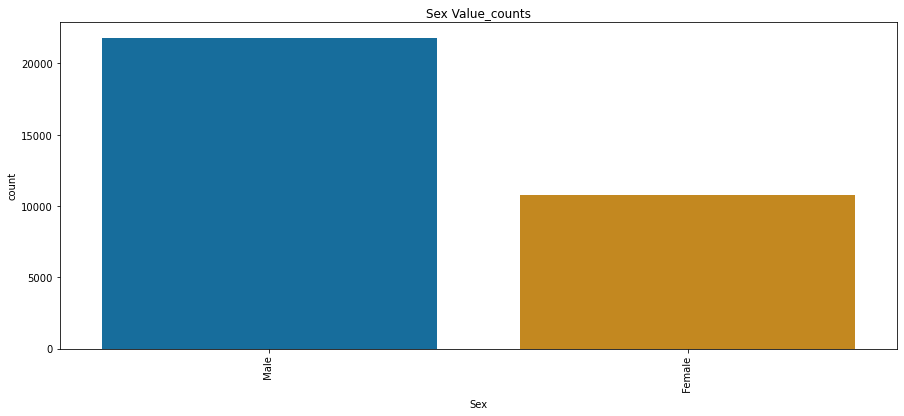

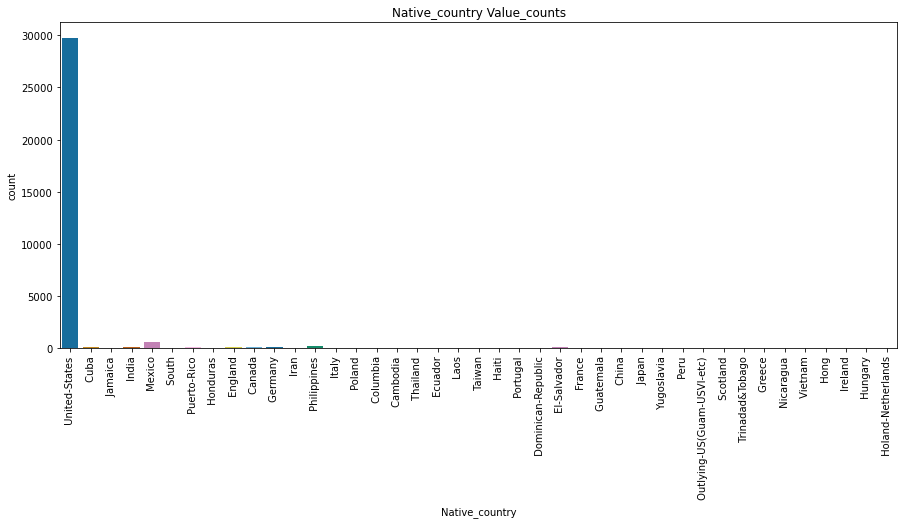

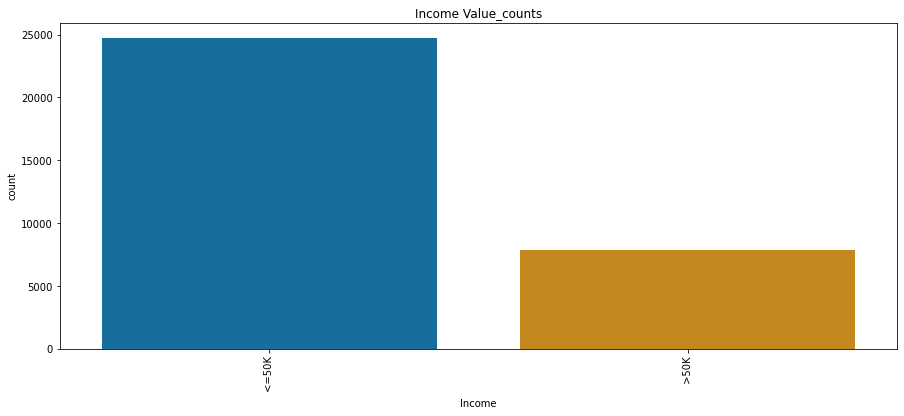

In [20]:
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(15,6))
    plt.title(col+' Value_counts')
    plt.xticks(rotation=90)
    sns.countplot(df.select_dtypes(include='object')[col],palette='colorblind',data=df.select_dtypes(include='object'))
    plt.show()

#### Univariate Analysis

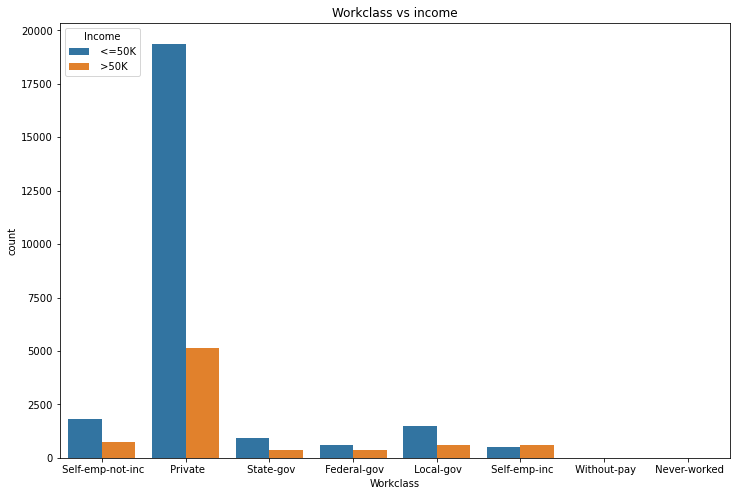

In [21]:
plt.figure(figsize=(12,8))
plt.title('Workclass vs income')
sns.countplot(x='Workclass',hue='Income',data=df)
plt.show()

We can see that Private employees have more <=50K and >50K Income.

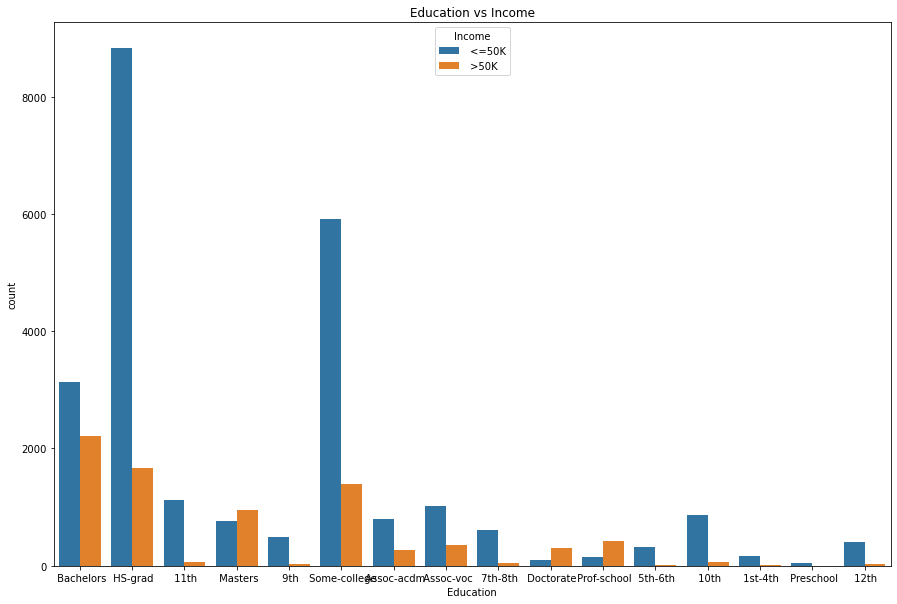

In [22]:
plt.figure(figsize=(15,10))
plt.title('Education vs Income')
sns.countplot(x='Education',hue='Income',data=df)
plt.show()

HS Grad Student have Most Imcome in the whole DataSet

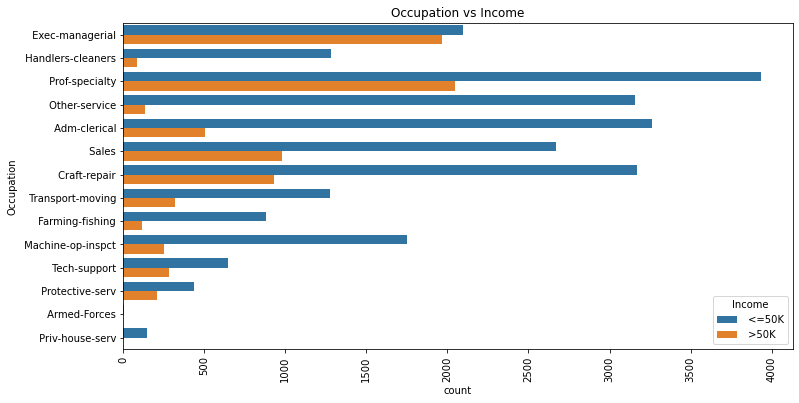

In [23]:
plt.figure(figsize=(12,6))
plt.title('Occupation vs Income')
sns.countplot(y='Occupation',hue='Income',data=df)
plt.xticks(rotation=90)
plt.show()

In Most of the column Most People have <=50 Income

Prof-specially have more income group than any other Occupation group.

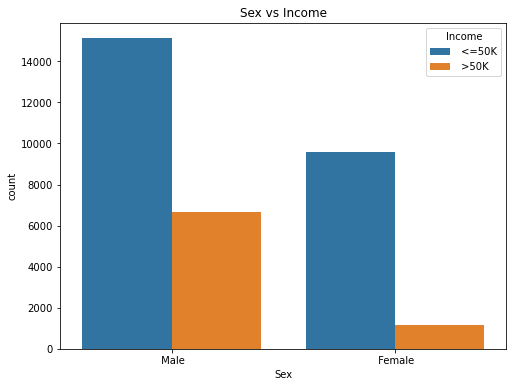

In [24]:
plt.figure(figsize=(8,6))
plt.title('Sex vs Income')
sns.countplot(x='Sex',hue='Income',data=df)
plt.show()

More Male Members have <=50 than Woman

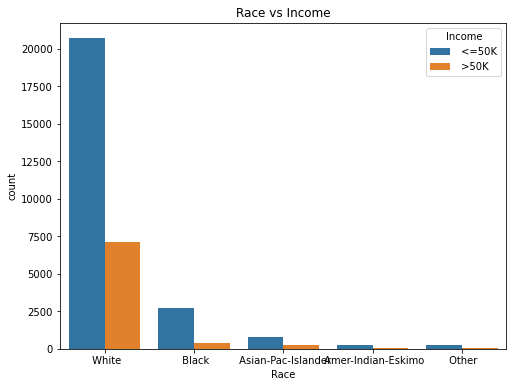

In [25]:
plt.figure(figsize=(8,6))
plt.title('Race vs Income')
sns.countplot(x='Race',hue='Income',data=df)
plt.show()

There are more White People Data Available.

White People have more income than any other.

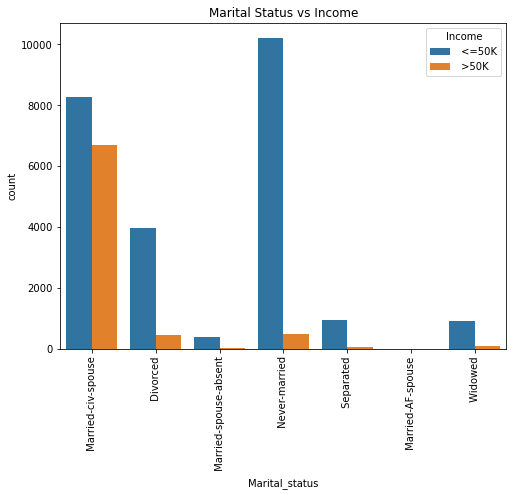

In [26]:
plt.figure(figsize=(8,6))
plt.title('Marital Status vs Income')
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.xticks(rotation=90)
plt.show()

Never married people have less than or equal 50K income.

Married civ spouse have more >50K people in whole Dataset

# Check Distribution of Data

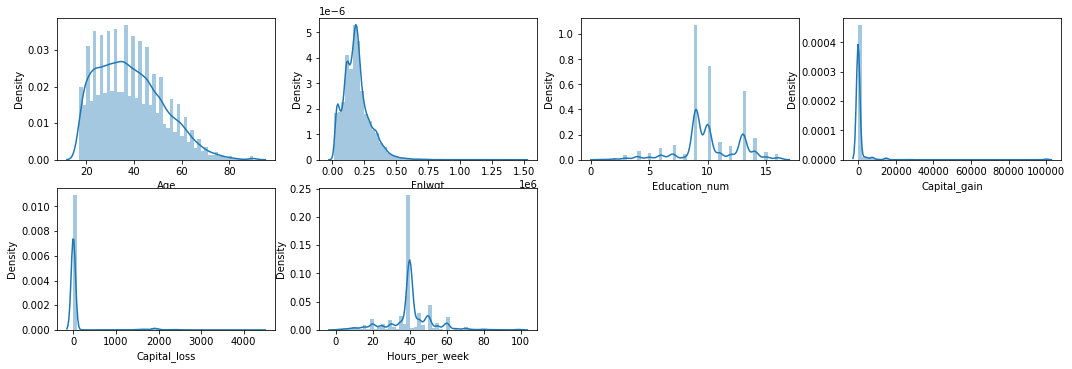

In [27]:
df_obj=df.select_dtypes(exclude='object')
plt.figure(figsize=(18,12))
plot=1
for col in df_obj:
    if plot<=6:
        plt.subplot(4,4,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

Age and Fnlwgt are right skewed.

captital_gain & Capital_loss are highly right skewed with majority of the values are zero..

Education_num needs treatment.

Hours_per_week seems Normal Distributed but it shows some variation in so, we need to treat.

# Checking Outliers

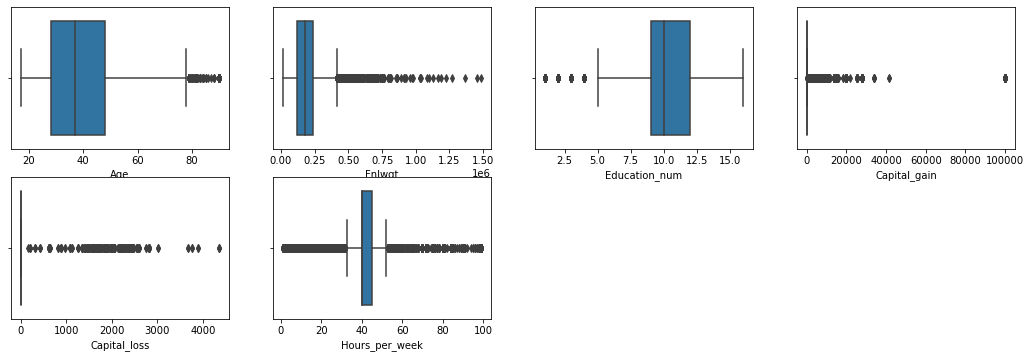

In [28]:
plt.figure(figsize=(18,12))
plot=1
for col in df_obj:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

There are Outliers Present in the dataset.

Capital_gain and capital_loss has mostly zero values as we seen in Distribution Plot

In [29]:
#Removing Outliers Using IQR
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    df.loc[df[col]>upper_limit,col]=upper_limit
    sns.boxplot(df[col])

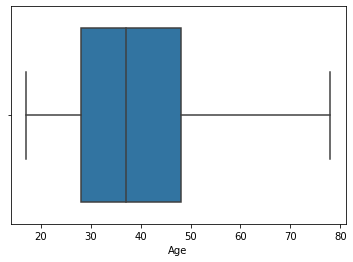

In [30]:
replace_outlier(df,'Age')

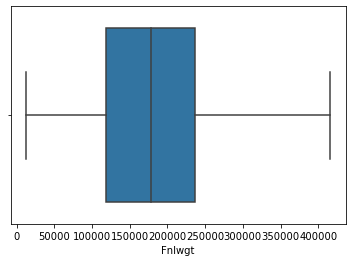

In [31]:
replace_outlier(df,'Fnlwgt')

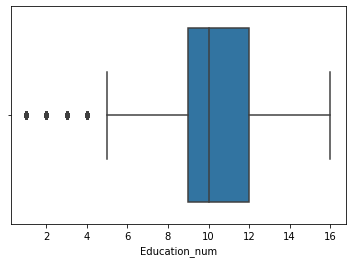

In [32]:
replace_outlier(df,'Education_num')

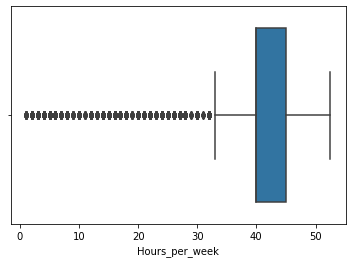

In [33]:
replace_outlier(df,'Hours_per_week')

Outliers Removed

We didnot remove outliers of capital_gain & capital_loss because it contains more than 90% values of Zero. we will drop it further.

In [34]:
df=df.drop(['Capital_gain','Capital_loss'],axis=1)

# Checking Skewness

In [35]:
df.skew()

Age               0.513883
Fnlwgt            0.548285
Education_num    -0.311630
Hours_per_week   -1.214044
dtype: float64

# Encoding

In [36]:
#importing Libraries
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_num=df.select_dtypes(include='object')
for col in df_num:
    df[col]=le.fit_transform(df[col])

In [37]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50.0,5,83311.0,9,13.0,2,3,0,4,1,13.0,38,0
1,38.0,3,215646.0,11,9.0,0,5,1,4,1,40.0,38,0
2,53.0,3,234721.0,1,7.0,2,5,0,2,1,40.0,38,0
3,28.0,3,338409.0,9,13.0,2,9,5,2,0,40.0,4,0
4,37.0,3,284582.0,12,14.0,2,3,5,4,0,40.0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,3,257302.0,7,12.0,2,12,5,4,0,38.0,38,0
32556,40.0,3,154374.0,11,9.0,2,6,0,4,1,40.0,38,1
32557,58.0,3,151910.0,11,9.0,6,0,4,4,0,40.0,38,0
32558,22.0,3,201490.0,11,9.0,4,0,3,4,1,20.0,38,0


Transform Object Value to Numerical

# Splitting Data into Input and Output Variable

In [38]:
x=df.drop(['Income'],axis=1)
y=df[['Income']]

In [39]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50.0,5,83311.0,9,13.0,2,3,0,4,1,13.0,38
1,38.0,3,215646.0,11,9.0,0,5,1,4,1,40.0,38
2,53.0,3,234721.0,1,7.0,2,5,0,2,1,40.0,38
3,28.0,3,338409.0,9,13.0,2,9,5,2,0,40.0,4
4,37.0,3,284582.0,12,14.0,2,3,5,4,0,40.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,3,257302.0,7,12.0,2,12,5,4,0,38.0,38
32556,40.0,3,154374.0,11,9.0,2,6,0,4,1,40.0,38
32557,58.0,3,151910.0,11,9.0,6,0,4,4,0,40.0,38
32558,22.0,3,201490.0,11,9.0,4,0,3,4,1,20.0,38


In [40]:
y

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


In [41]:
print(x.shape)
print('\n')
print(y.shape)

(32560, 12)


(32560, 1)


# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.844224,1.721336,-1.088236,-0.335443,1.134779,-0.406183,-0.790156,-0.900177,0.393675,0.703087,-2.624948,0.261374
1,-0.040984,-0.085223,0.302892,0.181319,-0.420027,-1.734026,-0.286703,-0.277810,0.393675,0.703087,0.072537,0.261374
2,1.065526,-0.085223,0.503412,-2.402489,-1.197429,-0.406183,-0.286703,-0.900177,-1.962583,0.703087,0.072537,0.261374
3,-0.778658,-0.085223,1.593398,-0.335443,1.134779,-0.406183,0.720204,2.211658,-1.962583,-1.422298,0.072537,-5.352855
4,-0.114752,-0.085223,1.027559,0.439700,1.523480,-0.406183,-0.790156,2.211658,0.393675,-1.422298,0.072537,0.261374
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.852425,-0.085223,0.740787,-0.852204,0.746077,-0.406183,1.475385,2.211658,0.393675,-1.422298,-0.127277,0.261374
32556,0.106550,-0.085223,-0.341209,0.181319,-0.420027,-0.406183,-0.034976,-0.900177,0.393675,0.703087,0.072537,0.261374
32557,1.434363,-0.085223,-0.367111,0.181319,-0.420027,2.249503,-1.545336,1.589291,0.393675,-1.422298,0.072537,0.261374
32558,-1.221262,-0.085223,0.154082,0.181319,-0.420027,0.921660,-1.545336,0.966924,0.393675,0.703087,-1.925600,0.261374


# Feature Importance

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [44]:
print(extra.feature_importances_)

[0.19071832 0.05133902 0.20451099 0.03897929 0.09840696 0.07799138
 0.08959102 0.08280019 0.01774106 0.03468223 0.09543222 0.01780733]


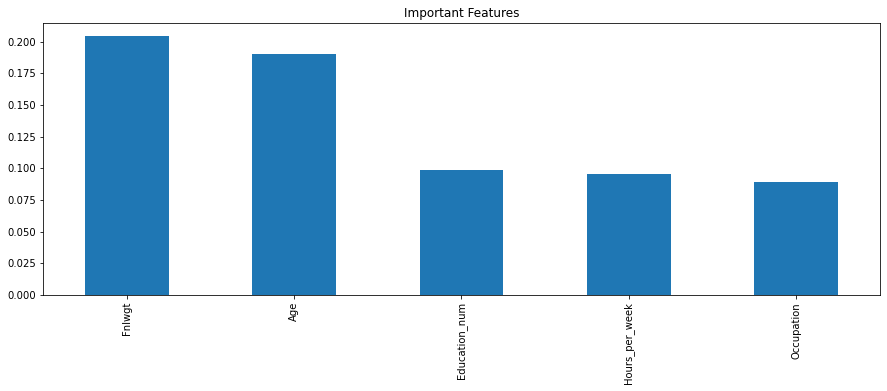

In [45]:
plt.figure(figsize=(15,5))
plt.title('Important Features',fontsize=12)
importance=pd.Series(extra.feature_importances_,index=x.columns)
importance.nlargest().plot(kind='bar')
plt.show()

# Model Building

In [46]:
#Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

# Lets Find the best Random state no for Maximum accuracy

In [47]:
maxAccu=0
maxRS=0


for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracu is',maxAccu,'on Random State',maxRS)

Best accuracu is 0.8181818181818182 on Random State 83


# Divide the data into Train and Test

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=83,stratify=y)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(24420, 12) (8140, 12) (24420, 1) (8140, 1)


In [49]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [50]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('AdaBoostClassifier',adb))

LogisticRegression


LogisticRegression()


Accuracy_score= 0.8078624078624078


Cross_Val_Score= 0.8072788697788698


roc_auc_score= 0.667389042995839


classification_report
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      6180
           1       0.67      0.40      0.50      1960

    accuracy                           0.81      8140
   macro avg       0.75      0.67      0.69      8140
weighted avg       0.79      0.81      0.79      8140



[[5799  381]
 [1183  777]]





GaussianNB


GaussianNB()


Accuracy_score= 0.7781326781326782


Cross_Val_Score= 0.7743857493857493


roc_auc_score= 0.7528498778152037


classification_report
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      6180
           1       0.53      0.70      0.60      1960

    accuracy                           0.78      8140
   macro avg       0.71      0.75      0.73      8140
weighted avg       0.81     

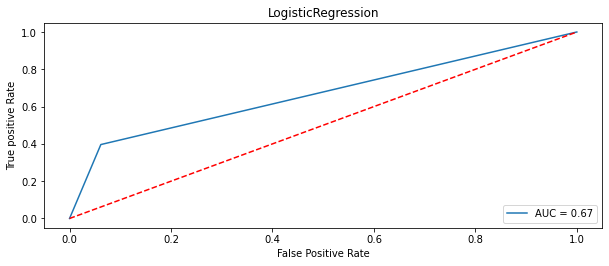

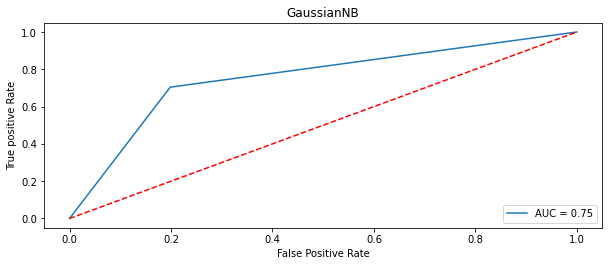

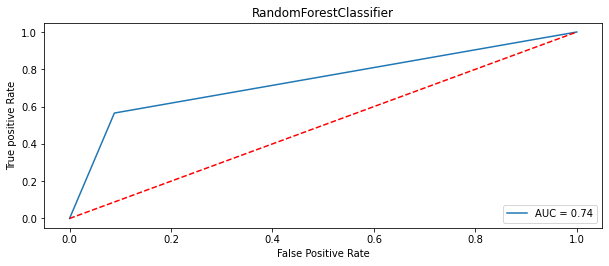

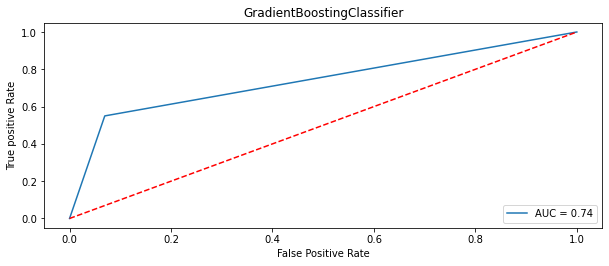

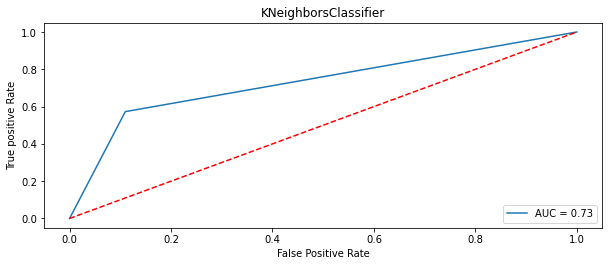

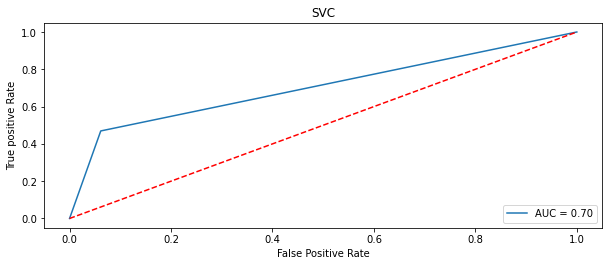

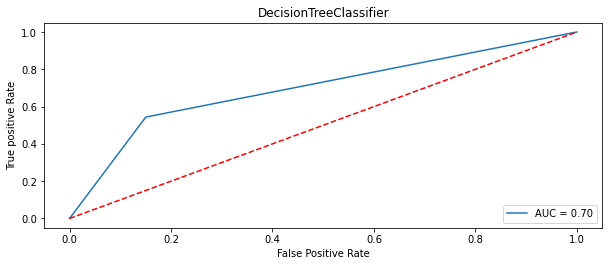

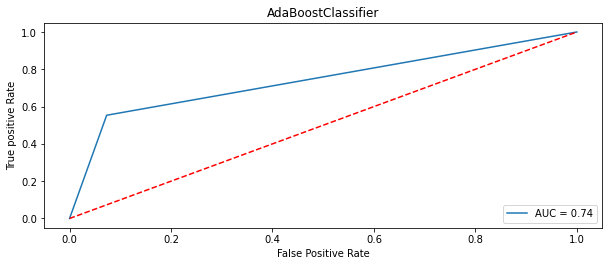

In [51]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print(name)
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [52]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,80.786241,80.727887,66.738904
1,GaussianNB,77.813268,77.438575,75.284988
2,RandomForestClassifier,82.825553,82.708845,73.847830
3,GradientBoostingClassifier,83.894349,84.186118,74.029126
4,KNeighborsClassifier,81.375921,81.673833,73.154432
5,SVC,82.555283,82.819410,70.394954
6,DecisionTreeClassifier,77.604423,77.592138,69.677696
7,AdaBoostClassifier,83.697789,83.820639,74.021613


Here our Adaboost model is most generalized model because the difference between accuracy score and Cross validation score is minimum. So we will select AdaBoost Classifier as our best model

# Hyperparameter Tuning

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,test_size=.20,stratify=y)
param={'n_estimators': [100,200,300],'learning_rate':[.001,.01,.1,1,10],'algorithm':['SAMME', 'SAMME.R']}

grid=GridSearchCV(estimator=adb,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}

In [54]:
ada_final=AdaBoostClassifier(n_estimators=200,algorithm='SAMME.R',learning_rate=1)
ada_final.fit(x_train,y_train)
pred=ada_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.8445945945945946


Final f_1 score : 0.6434108527131782


Final roc_auc score : 0.7969726647579964


Final classification Report :               precision    recall  f1-score   support

           0       0.93      0.88      0.90      5242
           1       0.58      0.72      0.64      1270

    accuracy                           0.84      6512
   macro avg       0.76      0.80      0.77      6512
weighted avg       0.86      0.84      0.85      6512



Final confusion Matrix : [[4587  655]
 [ 357  913]]


# Saving our model

In [55]:
import joblib
joblib.dump(ada_final,'Cencus_Income.pkl')

['Cencus_Income.pkl']

# THE END